## ToDo's
* get case counts for cities of wastewater not whole district
* normalization w.r.t rain/etc. here not really available

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

### case data

In [2]:
data_path = "../data/canada/covid19-download.csv"
dictionary_path = "../data/canada/covid19-casesdeaths-data-dictionary.csv"
df_cases = pd.read_csv(data_path)
dictionary_cases = pd.read_csv(dictionary_path)

In [3]:
df_cases.columns

Index(['pruid', 'prname', 'prnameFR', 'date', 'reporting_week',
       'reporting_year', 'update', 'totalcases', 'numtotal_last7',
       'ratecases_total', 'numdeaths', 'numdeaths_last7', 'ratedeaths',
       'ratecases_last7', 'ratedeaths_last7', 'numtotal_last14',
       'numdeaths_last14', 'ratetotal_last14', 'ratedeaths_last14',
       'avgcases_last7', 'avgincidence_last7', 'avgdeaths_last7',
       'avgratedeaths_last7'],
      dtype='object')

* pruid, prname, prnameFR: Names & identifiers
* date, reporting_week, reporting year
* update: Indicates if the jurisdiction reported an update that week for any indicator (1=yes 0=no)
* totalcases: The total number of cases reported from January 2020 until the end of the reporting week in a jurisdiction. 
* numtotal_last7: Total number of cases during the reporting week for a jurisdiction, minus the total number of cases from that jurisdiction's previous week's update.
* ratecases: Case rate per 100,000 population

In [4]:
df_cases[["pruid", "prname","prnameFR"]].drop_duplicates()

,pruid,prname,prnameFR
0,59,British Columbia,Colombie-Britannique
1,48,Alberta,Alberta
2,47,Saskatchewan,Saskatchewan
3,46,Manitoba,Manitoba
4,35,Ontario,Ontario
5,24,Quebec,Québec
6,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador
7,13,New Brunswick,Nouveau-Brunswick
8,12,Nova Scotia,Nouvelle-Écosse
9,11,Prince Edward Island,Île-du-Prince-Édouard


In [5]:
df_cases["date"].describe()

count           2685
unique           179
top       2020-02-01
freq              15
Name: date, dtype: object

### Wastewater data

In [6]:
data_path = "../data/canada/covid19-wastewater.csv"
dictionary_path = "../data/canada/covid19-wastewater-data-dictionary-en.csv"
df_wastewater = pd.read_csv(data_path)
dictionary_wastewater = pd.read_csv(dictionary_path)

In [9]:
df_wastewater[["region", "pruid"]].drop_duplicates()

,region,pruid
0,Montreal,24
2,North Battleford,47
471,Prince Albert,47
741,Saskatoon,47
1079,Alberton,11
1370,Vancouver,59
1626,Regina,47
1821,Bathurst,13
1875,Battery Point,12
1985,St. John's,10


In [15]:
df_wastewater.groupby(["region"]).min()["Date"]

region
Alberton                                     2022-11-02
Bathurst                                     2023-02-03
Battery Point                                2023-01-13
Brandon                                      2022-05-27
Bridgewater                                  2023-01-05
Campbellton                                  2023-02-10
City of Charlottetown & Town of Stratford    2022-05-05
Dominion-Bridgeport                          2023-01-19
Edmonton                                     2021-02-09
Fredericton                                  2022-12-22
Haines Junction                              2022-06-16
Halifax                                      2020-11-12
Miramichi                                    2023-02-16
Moncton                                      2022-06-13
Montague                                     2022-11-23
Montreal                                     2020-10-29
North Battleford                             2021-08-04
Prince Albert                            

In [36]:
df_wastewater["measureid"].unique() # only N2 gene detected using RT-qPCR

array(['covN2'], dtype=object)

In [40]:
df_wastewater["fractionid"].unique()

array(['solid', 'mixed'], dtype=object)

In [38]:
df_wastewater

,Date,Location,region,measureid,fractionid,viral_load,seven_day_rolling_avg,pruid
0,2021-12-08,Montreal North,Montreal,covN2,solid,116.061020,75.756258,24
1,2021-12-11,Montreal North,Montreal,covN2,solid,33.467815,74.764417,24
2,2021-08-04,North Battleford,North Battleford,covN2,mixed,0.870000,0.870000,47
3,2021-08-06,North Battleford,North Battleford,covN2,mixed,0.000000,0.435000,47
4,2021-12-15,Montreal North,Montreal,covN2,solid,58.932050,46.199933,24
...,...,...,...,...,...,...,...,...
8239,2021-11-20,Montreal North,Montreal,covN2,solid,10.380760,9.385953,24
8240,2021-11-24,Montreal North,Montreal,covN2,solid,13.888690,12.134725,24
8241,2021-11-27,Montreal North,Montreal,covN2,solid,14.028650,13.958670,24
8242,2021-12-01,Montreal North,Montreal,covN2,solid,32.346215,23.187432,24


In [35]:
dictionary_wastewater

,variable,description
0,fractionid,"Part of the wastewater sample being tested, ei..."
1,region,City or region of the city from where wastewat...
2,pruid,Unique province or territory identifier.
3,Location,City and wastewater treatment plant location.
4,measureID,Detection of N1 or N2 Gene of SARS-CoV-2 using...
5,LatestTrend,Describes if the trend over the past 5 weeks i...
6,seven_day_rolling_avg,Current 7 day-rolling average of the viral loa...
7,viral_load,Amount of SARS-CoV-2 genetic material present ...


In [47]:
df_wastewater["Location"].unique()

array(['Montreal North', 'North Battleford', 'Prince Albert', 'Saskatoon',
       'Alberton', 'Montreal South', 'Vancouver Lions Gate', 'Regina',
       'Bathurst', 'Battery Point', 'Vancouver Lulu Island', "St. John's",
       'Souris', 'Brandon', 'Vancouver Northwest Langley', 'Bridgewater',
       'Campbellton', 'Summerside', 'Fredericton', 'Winnipeg North End',
       'City of Charlottetown & Town of Stratford',
       'Toronto Ashbridges Bay', 'Haines Junction',
       'Toronto Highland Creek', 'Winnipeg South End',
       'Winnipeg West End', 'Toronto Humber', 'Toronto North Toronto',
       'Halifax Dartmouth', 'Trenton', 'Vancouver Annacis Island',
       'Halifax Halifax', 'Vancouver Iona Island', 'Dominion-Bridgeport',
       'Halifax Millcove', 'Edmonton Goldbar', 'Miramichi', 'Moncton',
       'Montague'], dtype=object)

In [46]:
df_wastewater["viral_load"]

0       116.061020
1        33.467815
2         0.870000
3         0.000000
4        58.932050
           ...    
8239     10.380760
8240     13.888690
8241     14.028650
8242     32.346215
8243     35.451495
Name: viral_load, Length: 8244, dtype: float64

## Visualize

In [54]:
df_cases["date"] = pd.to_datetime(df_cases["date"])
df_wastewater["Date"] = pd.to_datetime(df_wastewater["Date"])

In [24]:
prname = "Alberta"
df_sub = df_cases[df_cases["prname"]=="Alberta"]

In [25]:
df_sub[["date", "totalcases", "numtotal_last7", "numdeaths", "numdeaths_last7"]]

,date,totalcases,numtotal_last7,numdeaths,numdeaths_last7
1,2020-02-01,0,0.0,0,0.0
16,2020-02-08,0,0.0,0,0.0
31,2020-02-15,0,0.0,0,0.0
46,2020-02-22,0,0.0,0,0.0
61,2020-02-29,0,0.0,0,0.0
...,...,...,...,...,...
2611,2023-06-03,633477,191.0,5791,13.0
2626,2023-06-10,633601,124.0,5801,10.0
2641,2023-06-17,633693,92.0,5803,2.0
2656,2023-06-24,633781,88.0,5803,0.0


<AxesSubplot:xlabel='date', ylabel='numtotal_last7'>

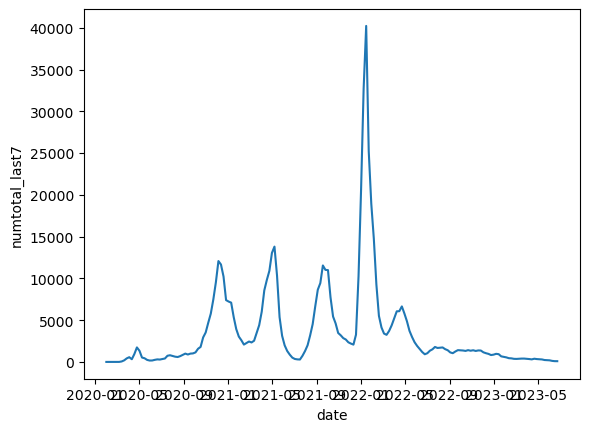

In [28]:
sns.lineplot(df_sub, x='date', y="numtotal_last7")

<AxesSubplot:xlabel='date', ylabel='numdeaths_last7'>

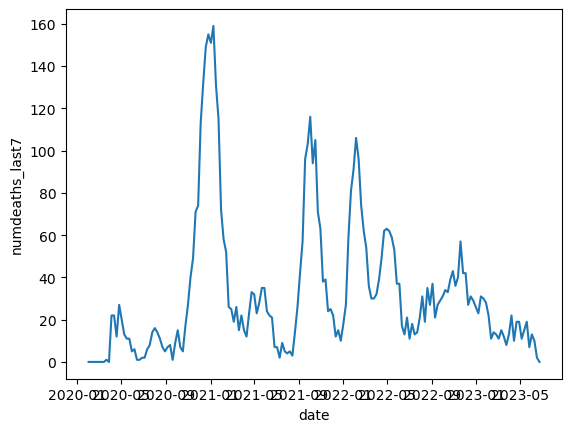

In [29]:
sns.lineplot(df_sub, x='date', y="numdeaths_last7")

In [55]:
df_sub = df_wastewater[df_wastewater['Location']=="Montreal North"]

<AxesSubplot:xlabel='Date', ylabel='viral_load'>

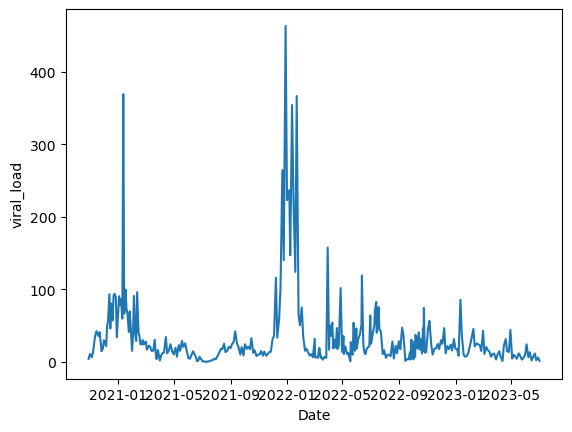

In [56]:
sns.lineplot(df_sub, x='Date', y="viral_load")